<p align="right">
  <img
    src="https://drive.google.com/uc?export=view&id=1CzGTq7D3I3CwRf5cfzAgK7H8xK5KNYDk"
    alt="pypl"
    width="300%"
    height="20%">
</p>

# Modulo 3

## Clase 2: Ratios, CAPM y Fama-French

## Instalación e importación de librerías

In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Descarga de precios históricos

El ticker ^GSPC representa el índice S&P 500 en la mayoría de las plataformas financieras, como Yahoo Finance.

S&P 500 (Standard & Poor's 500) es un índice bursátil que incluye las 500 empresas más grandes que cotizan en las bolsas de Estados Unidos, como el NYSE y el NASDAQ.

Es uno de los índices más utilizados para representar el comportamiento del mercado accionario estadounidense en general.

El símbolo comienza con ^ porque Yahoo Finance lo usa así para identificar índices (en lugar de acciones individuales).

In [ ]:
# Descargar datos de YPF y S&P 500
tickers = ["GOOG", "^GSPC"]
data = yf.download(tickers, start="2023-01-01", end="2025-01-01")
data

/tmp/ipython-input-2-38000210.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  2 of 2 completed


Price            Close                     High                      Low  \
Ticker            GOOG        ^GSPC        GOOG        ^GSPC        GOOG   
Date                                                                       
2023-01-03   89.169960  3824.139893   91.009034  3878.459961   88.493978   
2023-01-04   88.185814  3852.969971   90.700863  3873.159912   87.281195   
2023-01-05   86.257271  3808.100098   87.688764  3839.739990   86.048513   
2023-01-06   87.639069  3895.080078   87.947234  3906.189941   85.064369   
2023-01-09   88.275276  3892.090088   90.293280  3950.570068   88.056575   
...                ...          ...         ...          ...         ...   
2024-12-24  197.108246  6040.040039  197.208003  6040.100098  194.741780   
2024-12-26  196.639343  6037.589844  197.696863  6049.750000  195.412207   
2024-12-27  193.586487  5970.839844  196.340046  6006.169922  191.523327   
2024-12-30  192.239655  5906.939941  193.327103  5940.790039  189.915098   
2024-12-31  189.994904  5881.629883  192.798334  5929.740234  189.136913   

Price                          Open                 Volume              
Ticker            ^GSPC        GOOG        ^GSPC      GOOG       ^GSPC  
Date                                                                    
2023-01-03  3794.330078   89.299197  3853.290039  20738500  3959140000  
2023-01-04  3815.770020   90.472226  3840.360107  27046500  4414080000  
2023-01-05  3802.419922   87.549592  3839.739990  23136100  3893450000  
2023-01-06  3809.560059   86.843793  3823.370117  26612600  3923560000  
2023-01-09  3890.419922   88.667939  3910.820068  22996700  4311770000  
...                 ...         ...          ...       ...         ...  
2024-12-24  5981.439941  195.711509  5984.629883   6809800  1757720000  
2024-12-26  6007.370117  196.280184  6024.970215   7907900  2904530000  
2024-12-27  5932.950195  196.010815  6006.169922  14693000  3159610000  
2024-12-30  5869.160156  190.418923  5920.669922  12209500  3433250000  
2024-12-31  5868.859863  191.995222  5919.740234  14355200  3128350000  

[502 rows x 10 columns]

Seleccionamos el Precio al Cierre (Close)

In [ ]:
data = data['Close'][["GOOG", "^GSPC"]]
data

Ticker,GOOG,^GSPC
Date,,
2023-01-03,89.169960,3824.139893
2023-01-04,88.185814,3852.969971
2023-01-05,86.257271,3808.100098
2023-01-06,87.639069,3895.080078
2023-01-09,88.275276,3892.090088
...,...,...
2024-12-24,197.108246,6040.040039
2024-12-26,196.639343,6037.589844
2024-12-27,193.586487,5970.839844


## Visualización de precios

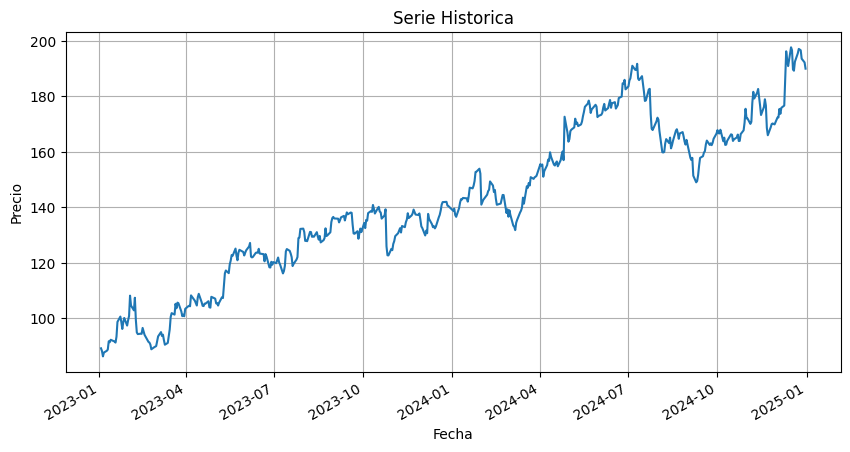

In [ ]:
data["GOOG"].plot(title="Serie Historica", figsize=(10, 5))
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid(True)
plt.show()

## Cálculo de retornos diarios y acumulados

Primero, se obtiene el retorno diario usando la variación porcentual entre un precio y el anterior (pct_change()), y luego se calcula el retorno acumulado multiplicando sucesivamente los factores de crecimiento diarios (1 + retorno diario) con cumprod(), lo que simula el efecto de reinvertir las ganancias cada día. Así, se puede ver cómo habría evolucionado una inversión inicial a lo largo del tiempo.

In [ ]:
data["return_diario"] = data["GOOG"].pct_change()
data["return_acumulado"] = (1 + data["return_diario"]).cumprod() - 1
data[["return_diario", "return_acumulado"]].dropna().head()

Ticker,return_diario,return_acumulado
Date,,
2023-01-04,-0.011037,-0.011037
2023-01-05,-0.021869,-0.032664
2023-01-06,0.016019,-0.017168
2023-01-09,0.007259,-0.010033
2023-01-10,0.004955,-0.005128


El **retorno diario** mide cuánto varió el precio de una acción de un día al siguiente, expresado como porcentaje. Se calcula comparando el precio del día actual con el del día anterior, y representa la ganancia (o pérdida) que un inversor habría tenido si compraba la acción al cierre de un día y la vendía al cierre del siguiente. Es útil para analizar la volatilidad y el comportamiento a corto plazo de una inversión.

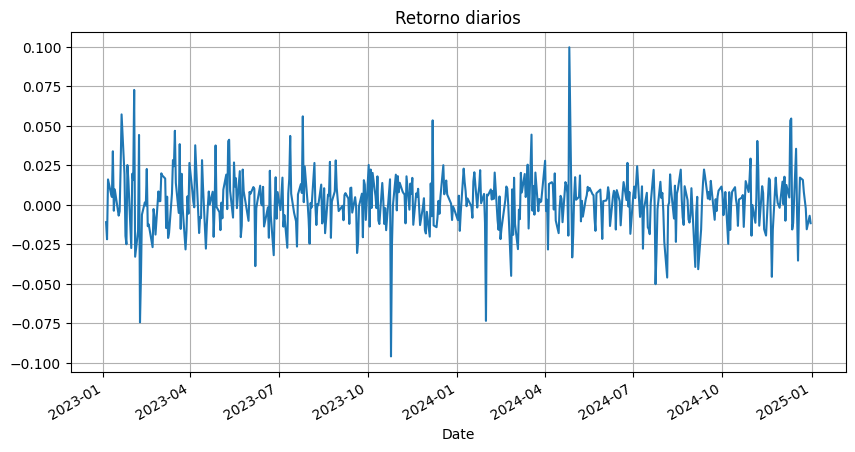

In [ ]:
data["return_diario"].plot(title="Retorno diarios", figsize=(10, 5))
plt.grid(True)
plt.show()

El **retorno acumulado**, en cambio, muestra cuánto habría ganado o perdido un inversor si hubiera comprado la acción al inicio del período y mantenido su inversión sin interrupciones. Se calcula multiplicando los factores de crecimiento diarios (1 + retorno diario) de forma sucesiva, lo que simula reinvertir cada ganancia. Este indicador refleja la rentabilidad total de la inversión a lo largo del tiempo.










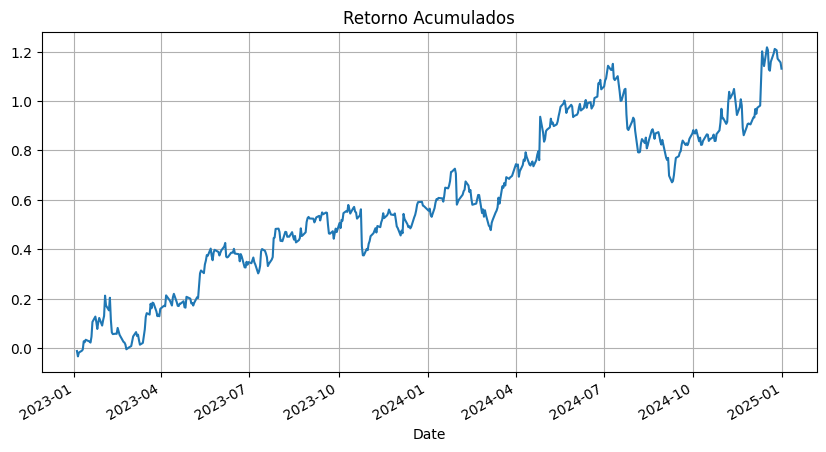

In [ ]:
data["return_acumulado"].plot(title="Retorno Acumulados", figsize=(10, 5))
plt.grid(True)
plt.show()

## Exceso de retorno diario

📈 ¿Qué es el Exceso de Retorno Diario?

El **exceso de retorno diario** mide cuánto rinde una inversión en un día **por encima del retorno libre de riesgo**. Es decir, nos dice **cuánta ganancia adicional** estamos obteniendo por asumir riesgo en lugar de invertir en un activo seguro (como un bono del Tesoro).

🧮 ¿Cómo se calcula?

Exceso de retorno diario = Retorno diario del activo - Retorno libre de riesgo diario

Si asumimos una **tasa libre de riesgo anual del 5%**, el retorno libre de riesgo diario se puede aproximar así:


In [ ]:
rf_anual = 0.05
rf_diaria = (1 + rf_anual) ** (1/252) - 1  # 252 días hábiles

data["exceso_retorno"] = data["return_diario"] - rf_diaria
data[["return_diario", "exceso_retorno"]].dropna().head()

Ticker,return_diario,exceso_retorno
Date,,
2023-01-04,-0.011037,-0.011230
2023-01-05,-0.021869,-0.022063
2023-01-06,0.016019,0.015826
2023-01-09,0.007259,0.007066
2023-01-10,0.004955,0.004761



**Simulamos una inversión de $1** y muestra cómo crece a lo largo del tiempo comparando dos escenarios:

1. **Invertir en un activo riesgoso** (por ejemplo, una acción) con retornos diarios reales.
2. **Invertir en un activo libre de riesgo**, como un bono, con una tasa diaria fija.


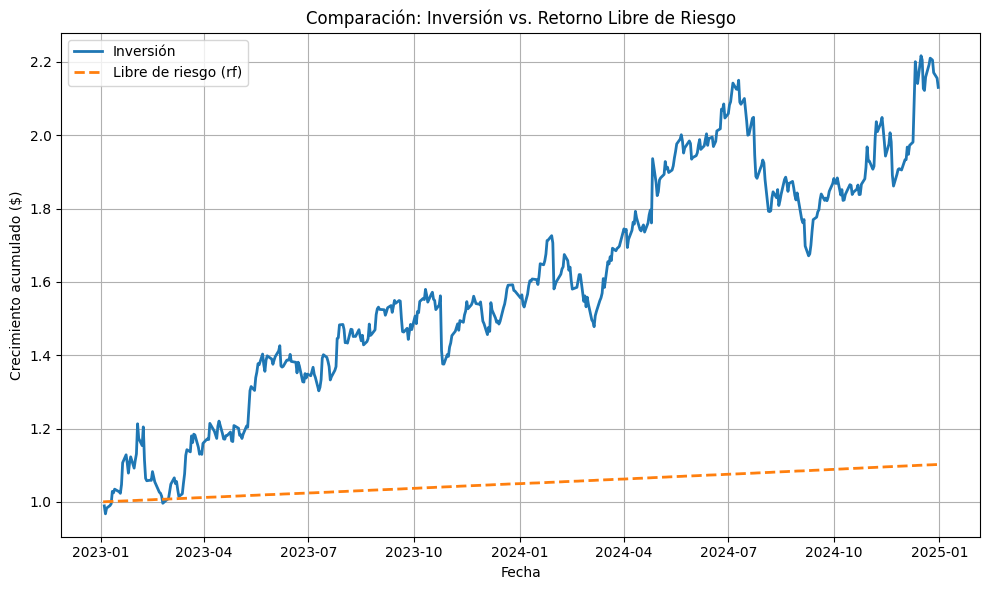

In [ ]:
# Calcular acumulado: inversión inicial de $1
data["acumulado_inversion"] = (1 + data["return_diario"]).cumprod()
data["acumulado_rf"] = (1 + rf_diaria) ** np.arange(len(data))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["acumulado_inversion"], label="Inversión", linewidth=2)
plt.plot(data.index, data["acumulado_rf"], label="Libre de riesgo (rf)", linestyle='--', linewidth=2)
plt.title("Comparación: Inversión vs. Retorno Libre de Riesgo")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento acumulado ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Volatilidad diaria

La **volatilidad diaria** de una acción mide cuánto varían sus retornos diarios en promedio respecto a su media. Es una forma de cuantificar el riesgo o inestabilidad de una inversión: cuanto más alta es la volatilidad, más impredecible (y potencialmente riesgosa) es la acción en el corto plazo.

In [ ]:
vol_diaria = data["return_diario"].std()
print(f"Volatilidad diaria de: {vol_diaria:.4%}")

Volatilidad diaria de: 1.8374%


# **Regresión Lineal Simple y Múltiple**

## ¿Qué es una regresión lineal?

La regresión lineal es una técnica estadística que se usa para entender y predecir la relación entre dos variables: una que queremos explicar (por ejemplo, el precio de una acción) y otra que creemos que la influye (como el tiempo o alguna medida económica). La idea es trazar una línea recta que pase lo más cerca posible de los puntos en un gráfico, de modo que esa línea nos permita estimar el valor futuro de la variable que nos interesa en base a la otra. En otras palabras, nos ayuda a responder preguntas como: "¿cuánto sube el precio si pasa una unidad de tiempo?"

In [ ]:
import statsmodels.api as sm

returns = data.pct_change().dropna()
returns.head()

Ticker,GOOG,^GSPC,return_diario,return_acumulado,exceso_retorno,acumulado_inversion,acumulado_rf
Date,,,,,,,
2023-01-05,-0.021869,-0.011646,0.981480,1.959611,0.964557,-0.021869,0.000194
2023-01-06,0.016019,0.022841,-1.732518,-0.474406,-1.717313,0.016019,0.000194
2023-01-09,0.007259,-0.000768,-0.546839,-0.415580,-0.553530,0.007259,0.000194
2023-01-10,0.004955,0.006978,-0.317442,-0.488889,-0.326141,0.004955,0.000194
2023-01-11,0.033841,0.012849,5.829810,-6.565227,6.066893,0.033841,0.000194


In [ ]:
returns['time'] = pd.Series(range(len(returns)), index=returns.index, name="time")

1. **Coeficientes (β)**
Representan el efecto estimado de cada variable independiente sobre la variable dependiente.

En este caso:

const (β₀): es el intercepto, el valor promedio del retorno de GOOG cuando time = 0.

time (β₁): indica cuánto se espera que cambie el retorno de GOOG por cada día que pasa.

📌 Ejemplo:
Si β₁ = 0.0003, significa que, según el modelo, el retorno de GOOG sube 0.03% por día.


---


2. **P-Value**
Mide la significancia estadística del coeficiente.

Si el p-value es menor a 0.05, se considera que el coeficiente es estadísticamente significativo (con 95% de confianza).

📌 Interpretación:
Un p-value bajo indica que la variable time tiene un impacto real sobre los retornos de GOOG.


---


3. **texto en negrita**R-squared (R²)
Indica qué porcentaje de la variabilidad de la variable dependiente es explicado por el modelo.

Va de 0 a 1:

0: el modelo no explica nada.

1: el modelo explica perfectamente los datos.

📌 Ejemplo:
Si R² = 0.35, significa que el 35% de las variaciones en los retornos de GOOG pueden explicarse por el paso del tiempo.


---



In [ ]:
import statsmodels.api as sm

X = returns['time']
y = returns["GOOG"]
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   GOOG   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4105
Date:                Thu, 26 Jun 2025   Prob (F-statistic):              0.522
Time:                        11:40:53   Log-Likelihood:                 1289.4
No. Observations:                 500   AIC:                            -2575.
Df Residuals:                     498   BIC:                            -2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.002      1.592      0.1

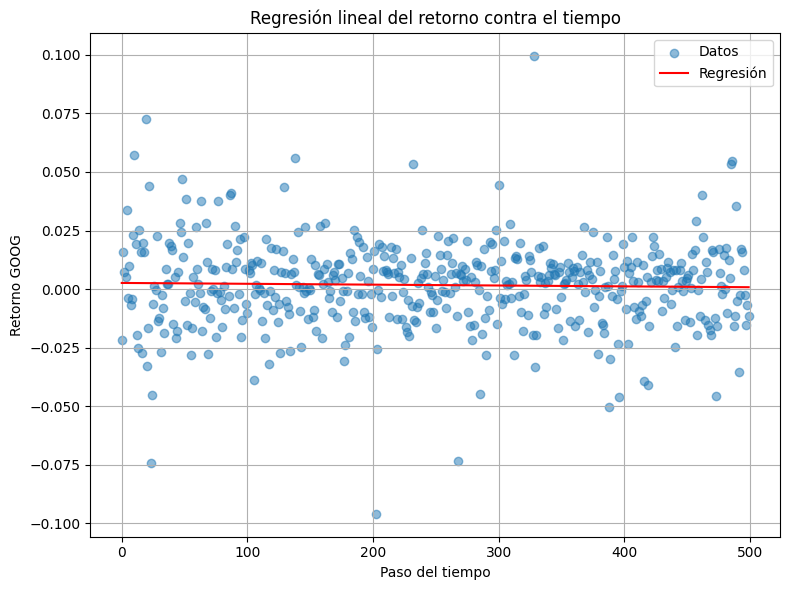

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot de los datos reales
plt.scatter(returns["time"], returns["GOOG"], alpha=0.5, label="Datos")

# Línea de la regresión (predicciones del modelo)
plt.plot(returns["time"], model.predict(X_const), color='red', label="Regresión")

# Etiquetas y formato
plt.xlabel("Paso del tiempo")
plt.ylabel("Retorno GOOG")
plt.title("Regresión lineal del retorno contra el tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Modelo CAPM**

## 📈 Interpretación financiera de una regresión entre AAPL y el S&P 500

Este modelo de regresión lineal nos permite estudiar la relación entre los **retornos diarios de una acción (AAPL)** y los del **mercado en general (S&P 500, representado por `^GSPC`)**.

Lo que estamos haciendo con `statsmodels.OLS()` es ajustar una **línea recta** que predice cuánto suele moverse AAPLle cada vez que se mueve el mercado.

---

### 🔍 Fórmula del modelo:
Retorno_AAPL = β₀ + β₁ × Retorno_S&P500 + error

---

### 📌 ¿Qué nos dicen los coeficientes?

- **β₁ (pendiente):**  
  Indica si la acción se mueve más o menos que el mercado.  
  - Si β₁ ≈ 1 → AAPL se comporta como el mercado.  
  - Si β₁ > 1 → AAPL es más volátil (más riesgosa).  
  - Si β₁ < 1 → AAPL es más estable (menos sensible al mercado).  
  Este coeficiente se conoce como el **Beta** de la acción.

- **β₀ (intercepto):**  
  Muestra cuánto rinde, en promedio, la acción de AAPL **cuando el retorno del mercado es 0**.  
  Si es positivo, indica que AAPL tiende a generar retorno incluso cuando el mercado está neutro.  
  Este valor se puede interpretar como el **Alpha**, es decir, el rendimiento adicional más allá del mercado.

---

### 🎯 ¿Por qué es útil este modelo?

- Nos permite **entender el comportamiento de una acción frente al mercado**.
- Es la base para calcular medidas como el **Beta (riesgo sistemático)** y el **Alpha (rendimiento adicional)**.
- Se utiliza en la práctica para **evaluar portafolios, fondos de inversión o estrategias de trading**.
- Además, es una excelente forma de **aprender regresión lineal en Python** usando datos reales del mercado financiero.

## Descargar precios y calcular retornos

In [ ]:
data = yf.download(["AAPL", "^GSPC"], start="2022-01-01", end="2024-12-31")['Close'][["AAPL", "^GSPC"]]
data.columns = ["AAPL", "SP500"]

# Calcular retornos diarios
returns = data.pct_change().dropna()

/tmp/ipython-input-15-1568647643.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["AAPL", "^GSPC"], start="2022-01-01", end="2024-12-31")['Close'][["AAPL", "^GSPC"]]
[*********************100%***********************]  2 of 2 completed


## Calcular exceso de retorno
Supongamos una tasa libre de riesgo del 5% anual

In [ ]:
rf_diaria = (1 + 0.05) ** (1/252) - 1

returns["AAPL_exceso"] = returns["AAPL"] - rf_diaria
returns["SP500_exceso"] = returns["SP500"] - rf_diaria

## Regresión lineal para estimar parametros



In [ ]:
X = sm.add_constant(returns["SP500_exceso"])  # const + X
y = returns["AAPL_exceso"]

modelo_capm = sm.OLS(y, X).fit()
print(modelo_capm.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_exceso   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1178.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          7.20e-156
Time:                        11:40:54   Log-Likelihood:                 2346.4
No. Observations:                 751   AIC:                            -4689.
Df Residuals:                     749   BIC:                            -4680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.599   

## Análisis de los coeficientes Alpha y Beta para AAPL

A partir del modelo de regresión lineal con excesos de retorno de AAPL y del S&P 500, obtenemos los siguientes resultados clave:

---

### ⚡ Alpha (const) = 0.0002

- Este valor representa el **rendimiento promedio diario adicional de AAPL**, luego de descontar el rendimiento del mercado.
- En este caso, el alpha es **positivo pero muy pequeño** (0.02% diario).
---

### 📈 Beta (SP500_exceso) = 1.2106

- Este coeficiente mide la **sensibilidad de AAPL al movimiento del mercado** (riesgo sistemático).
- Un beta de **1.21** indica que Apple tiende a moverse **un 21% más que el mercado**: si el S&P 500 sube 1%, AAPL sube en promedio 1.21%.
- El p-value es 0.000, por lo que el resultado es **altamente significativo**.

---

### ✅ Conclusión:

- **Apple tiene un comportamiento más agresivo que el mercado** (beta > 1), por lo tanto, presenta **mayor riesgo sistemático**.

Este análisis es útil para inversores que quieran entender si Apple "gana más" por mérito propio o simplemente porque asume más riesgo de mercado.

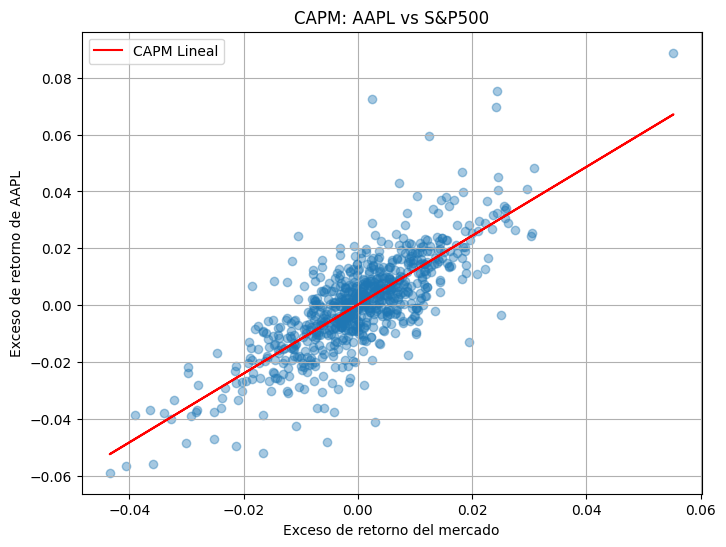

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(returns["SP500_exceso"], returns["AAPL_exceso"], alpha=0.4)
plt.plot(returns["SP500_exceso"], modelo_capm.predict(X), color="red", label="CAPM Lineal")
plt.title("CAPM: AAPL vs S&P500")
plt.xlabel("Exceso de retorno del mercado")
plt.ylabel("Exceso de retorno de AAPL")
plt.grid(True)
plt.legend()
plt.show()

# **Ratios de Performance Ajuste por Riesgo**

Cuando evaluamos una inversión no alcanza con mirar solo el retorno: también debemos considerar el **riesgo asumido para obtenerlo**. Los **ratios de performance ajustada por riesgo** nos ayudan a comparar inversiones que tienen distintos niveles de volatilidad o exposición al mercado.

In [ ]:
# Suponemos rf anual de 5%
rf_anual = 0.05
rf_diaria = (1 + rf_anual) ** (1/252) - 1

# Retornos diarios
rp = returns["AAPL"]
beta_aapl = modelo_capm.params[1]

/tmp/ipython-input-19-863606922.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_aapl = modelo_capm.params[1]


## Sharpe Ratio
El **Sharpe Ratio** mide cuánto retorno extra obtiene una inversión por cada unidad de riesgo total asumido (medido como volatilidad).

**Fórmula:**
Sharpe = (R - Rf) / σ

- `R`: retorno promedio de la inversión  
- `Rf`: retorno libre de riesgo  
- `σ`: desviación estándar (volatilidad) de los retornos

In [ ]:
excess_return = rp - rf_diaria
sharpe = excess_return.mean() / excess_return.std()
print(f"Sharpe Ratio: {sharpe:.4f}")

Sharpe Ratio: 0.0239


**Interpretación:** cuanto más alto el Sharpe, mejor es la relación riesgo-retorno. Un Sharpe Ratio de 1 o más ya se considera bueno.

## Treynor Ratio

El **Treynor Ratio** también mide el rendimiento ajustado por riesgo, pero en lugar de usar la volatilidad total, utiliza el **riesgo sistemático (beta)**, es decir, la exposición al mercado.

**Fórmula:**
Treynor = (R - Rf) / β

- `β`: beta de la inversión (sensibilidad al mercado)


In [ ]:
mean_excess_return = excess_return.mean()
treynor = mean_excess_return / beta_aapl
print(f"Treynor Ratio: {treynor:.4f}")

Treynor Ratio: 0.0003


**Interpretación:** útil cuando el inversor ya tiene una cartera bien diversificada y solo quiere medir el rendimiento ajustado por el riesgo de mercado. Cuanto mayor, mejor.

## Sortino Ratio

El **Sortino Ratio** es una mejora del Sharpe, pero en lugar de usar toda la volatilidad (`σ`), solo penaliza los **retornos negativos** (desviación negativa), ya que el riesgo que preocupa no es la variación positiva, sino perder dinero.

**Fórmula:**
Sortino = (R - Rf) / σ−

- `σ−`: desviación estándar de los retornos **negativos**


In [ ]:
downside_returns = np.where(excess_return < 0, excess_return, 0)
downside_std = np.std(downside_returns)
sortino = mean_excess_return / downside_std
print(f"Sortino Ratio: {sortino:.4f}")


Sortino Ratio: 0.0404



**Interpretación:** más realista que el Sharpe en contextos donde lo que preocupa es la caída del valor, no tanto su variabilidad total.


## Ejercicio: Comparación de 4 acciones

In [ ]:
# Lista de acciones
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']
benchmark = '^GSPC'

# Descargar precios ajustados
data = yf.download(tickers + [benchmark], start='2022-01-01', end='2024-12-31')['Close'][['AAPL', 'MSFT', 'GOOGL', 'TSLA', '^GSPC']]
data = data.dropna()
returns = data.pct_change().dropna()

/tmp/ipython-input-23-2610245760.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [benchmark], start='2022-01-01', end='2024-12-31')['Close'][['AAPL', 'MSFT', 'GOOGL', 'TSLA', '^GSPC']]
[*********************100%***********************]  5 of 5 completed


In [ ]:
rf_anual = 0.05
rf_diaria = (1 + rf_anual) ** (1/252) - 1

excess_returns = returns.sub(rf_diaria)
betas = {}

for ticker in tickers:
    X = sm.add_constant(excess_returns[benchmark])
    y = excess_returns[ticker]
    model = sm.OLS(y, X).fit()
    betas[ticker] = model.params[1]

/tmp/ipython-input-24-3606293516.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/tmp/ipython-input-24-3606293516.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/tmp/ipython-input-24-3606293516.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[ticker] = model.params[1]
/tmp/ipython-input-24-3606293516.py:11: FutureWarning: Series.__getitem__ treating

In [ ]:
ratios = []

for ticker in tickers:
    r = returns[ticker]
    excess = r - rf_diaria
    beta = betas[ticker]

    sharpe = excess.mean() / excess.std()
    treynor = excess.mean() / beta
    downside_std = np.std(np.where(excess < 0, excess, 0))
    sortino = excess.mean() / downside_std

    ratios.append({
        'Ticker': ticker,
        'Beta': beta,
        'Sharpe': sharpe,
        'Treynor': treynor,
        'Sortino': sortino
    })

df_ratios = pd.DataFrame(ratios).set_index('Ticker')
df_ratios.round(4)


,Beta,Sharpe,Treynor,Sortino
Ticker,,,,
AAPL,1.2106,0.0239,0.0003,0.0404
MSFT,1.2482,0.0178,0.0002,0.0295
GOOGL,1.3354,0.0190,0.0003,0.0317
TSLA,1.9558,0.0157,0.0003,0.0269


En resumen:

| Ratio      | Riesgo usado         | ¿Penaliza...?     | ¿Cuándo usarlo? |
|------------|----------------------|--------------------|-----------------|
| Sharpe     | Volatilidad total    | Retornos positivos y negativos | Comparar inversiones generales |
| Treynor    | Beta (riesgo de mercado) | Solo exposición al mercado | Cartera diversificada |
| Sortino    | Solo retornos negativos | Solo caídas | Enfocado en proteger capital |

# **Modelo de Fama-French 3 Factores**

El **modelo de Fama-French de 3 factores** es una extensión del CAPM que busca explicar mejor los retornos de una acción o cartera, incorporando no solo el riesgo de mercado, sino también dos factores adicionales relacionados con características fundamentales de las empresas.

### 🧪 Fórmula: R - Rf = α + β1 × (Rm - Rf) + β2 × SMB + β3 × HML + error

### 📌 ¿Qué significan los factores?

- `Rm - Rf`: **Exceso de retorno del mercado** (igual que en el CAPM).
- `SMB` (**Small Minus Big**): mide la diferencia de rendimiento entre acciones de **empresas pequeñas** y **grandes**. Captura el efecto de tamaño.
- `HML` (**High Minus Low**): mide la diferencia entre acciones con **alto valor contable/mercado** y aquellas con bajo. Captura el efecto de **"value vs. growth"**.
- `α`: el rendimiento adicional que no puede explicarse por los tres factores (alpha).
- `β1`, `β2`, `β3`: sensibilidad de la acción a cada factor.

### 🎯 ¿Para qué se usa?

Este modelo se usa para entender mejor **por qué una acción rinde más o menos que el promedio del mercado**, considerando su tamaño y su perfil de valor. Es muy utilizado en análisis de carteras, gestión activa y estudios académicos.


## Descarga de los factores -- Desde Kenneth French Data Library

In [ ]:

url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip"
factors = pd.read_csv(url, skiprows=3)
factors = factors.rename(columns={"Unnamed: 0": "Date"})
factors = factors[factors["Date"].str.isnumeric()]
factors["Date"] = pd.to_datetime(factors["Date"], format="%Y%m%d")
factors = factors.set_index("Date").astype(float) / 100  # de % a decimal
factors = factors[["Mkt-RF", "SMB", "HML", "RF"]]
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0009,-0.0025,-0.0027,0.00009
1926-07-02,0.0045,-0.0033,-0.0006,0.00009
1926-07-06,0.0017,0.0030,-0.0039,0.00009
1926-07-07,0.0009,-0.0058,0.0002,0.00009
1926-07-08,0.0022,-0.0038,0.0019,0.00009
...,...,...,...,...
2025-04-24,0.0214,0.0035,-0.0095,0.00017
2025-04-25,0.0064,-0.0008,-0.0115,0.00017
2025-04-28,0.0008,0.0022,0.0014,0.00017


In [ ]:
prices = yf.download("AAPL", start="2022-01-01", end="2024-12-31")["Close"]["AAPL"]
returns = prices.pct_change().dropna()
returns.name = "AAPL"

data = pd.concat([returns, factors], axis=1).dropna()
data["AAPL_excess"] = data["AAPL"] - data["RF"]

/tmp/ipython-input-27-1594402061.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download("AAPL", start="2022-01-01", end="2024-12-31")["Close"]["AAPL"]
[*********************100%***********************]  1 of 1 completed


## Regresion Multiple

In [ ]:
X = data[["Mkt-RF", "SMB", "HML"]]
X = sm.add_constant(X)
y = data["AAPL_excess"]

model_ff3 = sm.OLS(y, X).fit()
print(model_ff3.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_excess   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     425.0
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          5.12e-161
Time:                        11:40:55   Log-Likelihood:                 2365.6
No. Observations:                 751   AIC:                            -4723.
Df Residuals:                     747   BIC:                            -4705.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.458      0.6

## Análisis de la regresión Fama-French para AAPL

Esta salida corresponde a un modelo de **Fama-French de 3 factores**, que intenta explicar el exceso de retorno diario de Apple (`AAPL_excess`) en función de:

- `Mkt-RF`: el exceso de retorno del mercado.
- `SMB`: el factor tamaño (small minus big).
- `HML`: el factor valor (high minus low).

---

### 🔍 Coeficientes estimados:

| Factor     | Coeficiente | Significativo | Interpretación |
|------------|-------------|----------------|----------------|
| **const**  | 0.0002      | ❌ No          | El alpha no es significativo (p=0.647), por lo que **no hay evidencia de que AAPL rinda más allá de lo explicado por los tres factores**. |
| **Mkt-RF** | 1.0993      | ✅ Sí          | Apple tiene un **beta de mercado ligeramente superior a 1**, lo que indica que **es más volátil que el mercado**. Si el mercado sube 1%, AAPL sube en promedio 1.10%. |
| **SMB**    | -0.2675     | ✅ Sí          | El coeficiente negativo indica que **AAPL se comporta como una empresa grande**, ya que **rinde peor cuando el factor "empresas pequeñas" (SMB) sube**. |
| **HML**    | -0.3127     | ✅ Sí          | El valor negativo sugiere que Apple actúa como una **acción de crecimiento (growth)** y **no como una acción de valor**. Le va peor cuando el mercado favorece a las acciones "baratas". |

---

### 📈 Estadísticas del modelo:

- **R-squared = 0.631**: El modelo explica un **63,1% de la variabilidad en los excesos de retorno de AAPL**, lo cual es **muy bueno para datos financieros** diarios.
- **Todos los factores (menos el intercepto) son altamente significativos**, con p-values muy cercanos a 0.

---

### ✅ Conclusión:

El modelo Fama-French muestra que **el rendimiento de Apple puede explicarse en gran medida por su exposición al mercado y a los factores tamaño y valor**:

- **No genera un rendimiento extra (alpha)** más allá de lo que explican los factores.
- Es una acción con **alto beta de mercado**, **perfil de empresa grande** y **orientación "growth"**.

Este análisis es útil para inversores que quieran entender **de dónde proviene el rendimiento de AAPL** y qué tipo de riesgo están asumiendo al invertir en ella.


# Ejercicio integrador – Análisis de performance y riesgo de 4 acciones

- Seleccioná 4 acciones estadounidenses (ej: AAPL, MSFT, GOOGL, TSLA).

- Descargá los precios históricos diarios desde enero 2022 hasta diciembre 2024.

- Calculá los retornos diarios y el exceso de retorno usando una tasa libre de riesgo del 5% anual.

- Estimá el Beta de cada acción respecto al S&P 500 usando el modelo CAPM.

- Calculá los ratios de Sharpe, Treynor y Sortino para cada acción.

- Descargá los factores de Fama-French y aplicá una regresión de 3 factores a cada acción.

- Compará los R² del CAPM vs Fama-French.

- Elegí la mejor acción en función de rendimiento ajustado por riesgo y calidad del ajuste del modelo.
